<a href="https://colab.research.google.com/github/ChaaruVijay/DSPL-CourseWork/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [18]:
df=pd.read_csv('train_cleaned.csv')

In [19]:
target_col='cluster_catgeory'
y=df[target_col]
X=df.drop(columns=[target_col])

In [20]:
# (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [21]:
# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [22]:
# Evaluate Classification Model
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

         1.0       0.95      0.93      0.94     56688
         2.0       0.92      0.92      0.92     46515
         3.0       0.78      0.86      0.82     14667
         4.0       0.93      0.95      0.94     51728
         5.0       0.80      0.70      0.74     11857
         6.0       0.93      0.92      0.92     50762

    accuracy                           0.92    232217
   macro avg       0.88      0.88      0.88    232217
weighted avg       0.92      0.92      0.92    232217

Confusion Matrix:
 [[52843     2     2  3839     1     1]
 [    0 42794     2     2     2  3715]
 [    1     1 12599     1  2064     1]
 [ 2536     0     5 49184     3     0]
 [    1     0  3608     2  8244     2]
 [    0  3877     4     4     2 46875]]


In [ ]:
disp=ConfusionMatrixDisplay(confusion_matrix=rf_cm,display_labels = rf_best.classes_)

In [23]:
# Hyperparameter tuning for Random Forest
param_dist = {'n_estimators': [50, 100], 'max_depth': [10, 20, None], 'criterion': ['gini', 'entropy']}
rf_rscv = RandomizedSearchCV(RandomForestClassifier(),param_dist,n_iter=10, cv=5, scoring='recall_macro')
rf_rscv.fit(X_train, y_train)
print("Best Parameters:", rf_rscv.best_params_)

Best Parameters: {'n_estimators': 100, 'max_depth': None, 'criterion': 'entropy'}


In [25]:
# Train optimized Random Forest Classifier
rf_optimal = RandomForestClassifier(**rf_rscv.best_params_)
rf_optimal.fit(X_train, y_train)
y_pred_rf_optimal = rf_optimal.predict(X_test)
print("Optimized Classification Report:\n", classification_report(y_test, y_pred_rf_optimal))


Optimized Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     56688
         2.0       1.00      1.00      1.00     46515
         3.0       1.00      1.00      1.00     14667
         4.0       1.00      1.00      1.00     51728
         5.0       1.00      1.00      1.00     11857
         6.0       1.00      1.00      1.00     50762

    accuracy                           1.00    232217
   macro avg       1.00      1.00      1.00    232217
weighted avg       1.00      1.00      1.00    232217



In [26]:
rf_best = rf_rscv.best_estimator_

In [27]:
print(rf_rscv.best_params_)

{'n_estimators': 100, 'max_depth': None, 'criterion': 'entropy'}


In [29]:
#make prediction on the test data
y_pred_rf = rf_best.predict(X_test)

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

In [32]:
print("confusion_matrix for RF")
rf_cm=confusion_matrix(y_test,y_pred_rf)
disp=ConfusionMatrixDisplay(confusion_matrix=rf_cm,display_labels = rf_best.classes_)

confusion_matrix for RF


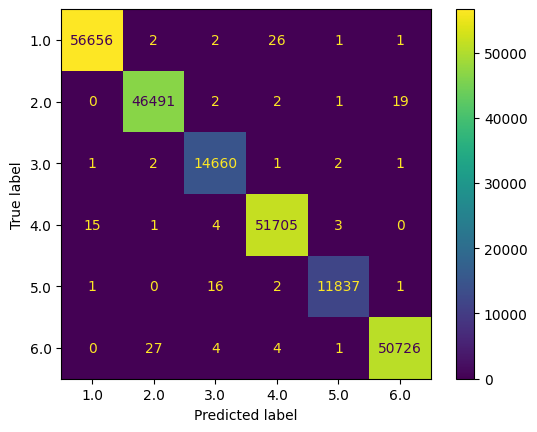

In [33]:
disp.plot()

In [34]:
from sklearn.metrics import accuracy_score

# Train Accuracy
train_accuracy = accuracy_score(y_train, rf.predict(X_train))
print(f"Train Accuracy: {train_accuracy:.4f}")

# Test Accuracy
test_accuracy = accuracy_score(y_test, rf.predict(X_test))
print(f"Test Accuracy: {test_accuracy:.4f}")


Train Accuracy: 0.9151
Test Accuracy: 0.9153


In [35]:
# Feature Importance
importances = rf_optimal.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", feature_importance_df)

Feature Importance:
         Feature  Importance
3     dry_sales    0.387086
2   fresh_sales    0.265069
1  luxury_sales    0.204968
0   outlet_city    0.142877


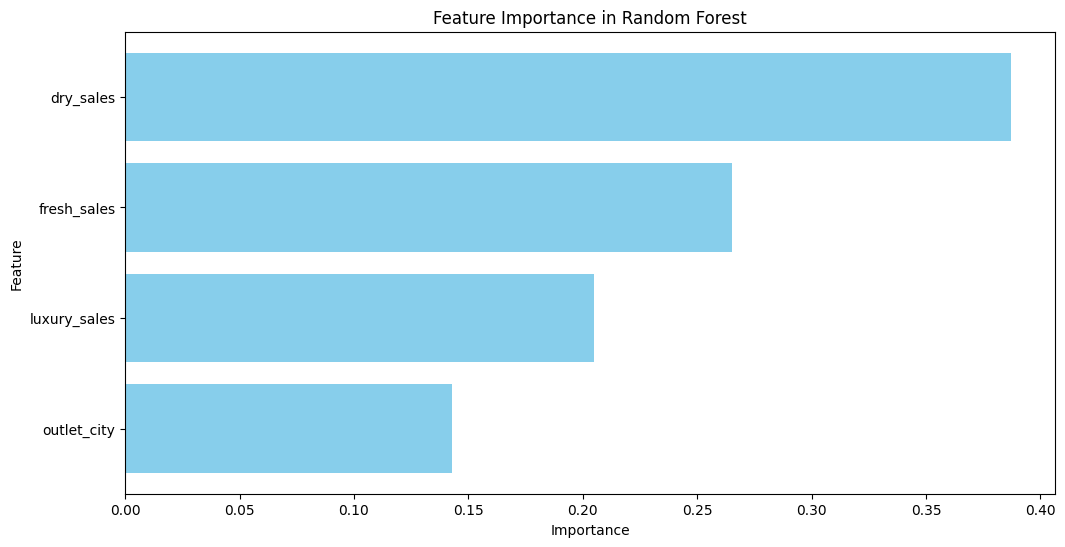

In [36]:
# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [45]:
from sklearn.model_selection import learning_curve
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

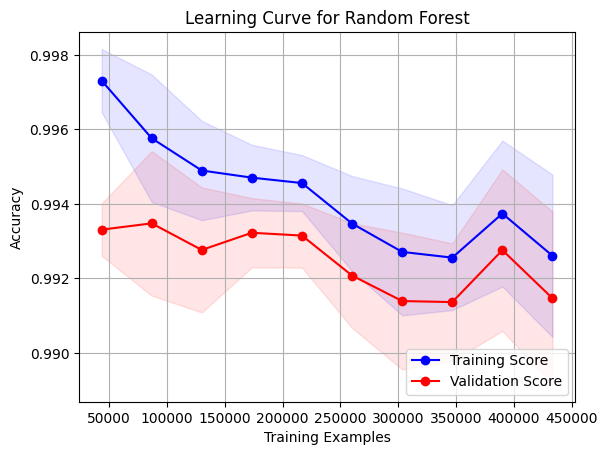

In [50]:
# Plot training accuracy
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
# Plot validation accuracy
plt.plot(train_sizes, test_mean, 'o-', color="red", label="Validation Score")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="red")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [52]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42) #This is where 'rf' is redefined
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [53]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head(10))

        Actual  Predicted
136482     4.0        4.0
466661     1.0        1.0
81511      4.0        4.0
687267     6.0        6.0
377685     1.0        1.0
340981     5.0        3.0
541965     1.0        1.0
99845      4.0        4.0
332401     5.0        5.0
514841     1.0        1.0


In [54]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Model Accuracy: {accuracy:.4f}")

Overall Model Accuracy: 0.9906
